# <div style="text-align: center; color:black; background-color: #000011; font-size: 37px; font-family: Fantasy; padding: 5px; border-radius:10px; text-shadow: 0 0 5px white, 0 0 5px white, 0 0 5px blue, 0 0 10px blue, 0 0 10px blue, 0 0 10px blue, 0 0 50px blue;">Pronóstico de ventas futuras usando el algoritmo Prophet</div>


<center> <img src="../images/ventas.jpg" /> </center>

**Fuente de datos:** [Kaggle](https://www.kaggle.com/competitions/rossmann-store-sales/data)

**Descripción**

Rossmann opera más de 3.000 farmacias en 7 países europeos. Actualmente, los gerentes de las tiendas Rossmann tienen la tarea de predecir sus ventas diarias con hasta seis semanas de anticipación. Las ventas en las tiendas están influenciadas por muchos factores, incluidas las promociones, la competencia, los días festivos escolares y estatales, la estacionalidad y la localidad. Con miles de gerentes individuales que predicen las ventas en función de sus circunstancias únicas, la precisión de los resultados puede ser bastante variada.

Información del dataset de ventas

* **Id** : un Id. que representa un duplicado (Tienda, Fecha) dentro del conjunto de prueba.          
* **Tienda** : una identificación única para cada tienda      
* **Ventas** : la facturación de un día determinado (esto es lo que estás prediciendo)        
* **Clientes** : el número de clientes en un día determinado.     
* **Abierto** : un indicador de si la tienda estaba abierta: 0 = cerrada, 1 = abierta     
* **StateHoliday** : indica un feriado estatal. Normalmente todas las tiendas, con pocas excepciones, están cerradas los días festivos        estatales. Tenga en cuenta que todas las escuelas están cerradas los días festivos y fines de semana. a = día       festivo, b = feriado de Semana Santa, c = Navidad, 0 = Ninguno       
SchoolHoliday - indica si la (Tienda, Fecha) fue afectada por el cierre de escuelas públicas
* **StoreType**  : diferencia entre 4 modelos de tienda diferentes: a, b, c, d        
* **Surtido** : describe un nivel de surtido: a = básico, b = extra, c = ampliado     
* **CompetitionDistance** : distancia en metros hasta la tienda de la competencia más cercana     
CompetitionOpenSince[Mes/Año] - proporciona el año y mes aproximados en que se abrió el competidor más cercano.     
* **Promoción** : indica si una tienda está realizando una promoción ese día.     
     


Información del dataset de las tiendas

* **StoreType**: categoría que indica el tipo de tienda (a, b, c, d)
* **Assortment**:  a = básico, b = extra, c = extedido
* **CompetitionDistance (en metros)**: distancia a la tienda de la competencia más cercana
* **CompetitionOpenSince [Mes/Año**]:  fecha en que abrió la competencia
* **Promo2**: Promo2 es una promoción continuada y consecutiva en algunas tiendas (0 = la tienda no participa, 1 = la tienda participa)
* **Promo2Since [Año/Semana]**: fecha en la que la tienda empieza a participar en la Promo2
* **PromoInterval**: describe los intervalos consecutivos donde la Promo2 empieza, indicando los meses en los que empieza la misma. P.e. "Feb,May,Aug,Nov" significa que cada nueva ronda de promoción empieza en Febrero, Mayo, Agosto, Noviembre de cualquier año de esa tienda


<center> <img src="../images/img2.png" /> </center>

## <div style="text-align: center; color:black; background-color: #000011; font-size: 30px; font-family: Fantasy; padding: 5px; border-radius:10px; text-shadow: 0 0 5px white, 0 0 5px white, 0 0 5px blue, 0 0 10px blue, 0 0 10px blue, 0 0 10px blue, 0 0 50px blue;">Importar las librerias y dataset a usar</div>




### <font color="cyan">Librerias</font>

In [121]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from prophet import Prophet

### <font color="cyan">Importar dataset de las transacciones</font>

In [6]:
df_sales = pd.read_csv('../data/train.csv')
df_sales.head()

C:\Users\Alex\AppData\Local\Temp\ipykernel_4868\841099008.py:1: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df_sales = pd.read_csv('../data/train.csv')


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [10]:
df_sales.tail()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1
1017208,1115,2,2013-01-01,0,0,0,0,a,1


In [8]:
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


* 9 columnas en total 
* 8 características, cada una con 1017209 puntos de datos
* 1 variable objetivo (ventas)

In [12]:
df_sales.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00


* Cantidad de ventas promedio por día = 5773 Euros, ventas mínimas por día = 0, ventas máximas por día = 41551
* Número medio de clientes = 633, número mínimo de clientes = 0, número máximo de clientes = 7388

### <font color="cyan">Importar información de las tiendas</font>

In [7]:
df_store = pd.read_csv("../data/store.csv")
df_store.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [11]:
df_store.tail()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN
1114,1115,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec"


In [9]:
df_store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


* Este data frame solo incluye información sobre las 1115 tiendas exclusivas que forman parte de este estudio.
* Se observa la presencia de datos faltantes.

In [13]:
df_store.describe()

,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1115.00000,1112.000000,761.000000,761.000000,1115.000000,571.000000,571.000000
mean,558.00000,5404.901079,7.224704,2008.668857,0.512108,23.595447,2011.763573
std,322.01708,7663.174720,3.212348,6.195983,0.500078,14.141984,1.674935
min,1.00000,20.000000,1.000000,1900.000000,0.000000,1.000000,2009.000000
25%,279.50000,717.500000,4.000000,2006.000000,0.000000,13.000000,2011.000000
50%,558.00000,2325.000000,8.000000,2010.000000,1.000000,22.000000,2012.000000
75%,836.50000,6882.500000,10.000000,2013.000000,1.000000,37.000000,2013.000000
max,1115.00000,75860.000000,12.000000,2015.000000,1.000000,50.000000,2015.000000


* La distancia media de la competencia es de 5404 metros (5,4 kms)
* La distancia de la competencia más cercana es de 20 metros y el más lejano es de 75860 metros.

In [14]:
df_store.describe(include="object")

,StoreType,Assortment,PromoInterval
count,1115,1115,571
unique,4,3,3
top,a,a,"Jan,Apr,Jul,Oct"
freq,602,593,335


* Se observa que los meses de Jan,Apr,Jul,Oct la tienda ha estado realizando promociones contantes.

## <div style="text-align: center; color:black; background-color: #000011; font-size: 30px; font-family: Fantasy; padding: 5px; border-radius:10px; text-shadow: 0 0 5px white, 0 0 5px white, 0 0 5px blue, 0 0 10px blue, 0 0 10px blue, 0 0 10px blue, 0 0 50px blue;">Análisis exploratorio de los datos</div>

### <font color="cyan">Búsqueda de datos faltantes en el dataset de ventas</font>

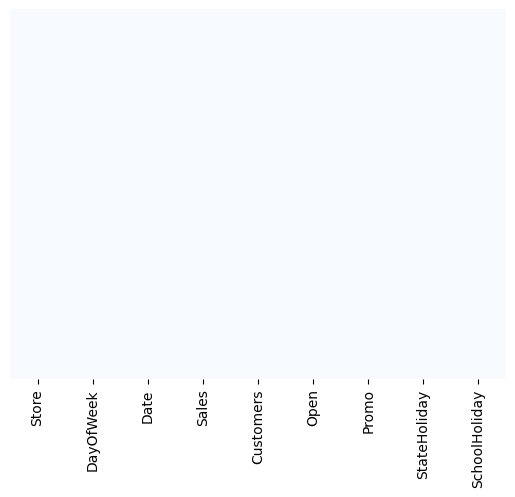

In [21]:
sns.heatmap(df_sales.isnull(), yticklabels=False, cbar=False, cmap="Blues");

* No hay presencia de datos faltantes en el dataset de ventas.

### <font color="cyan">Histograma</font>

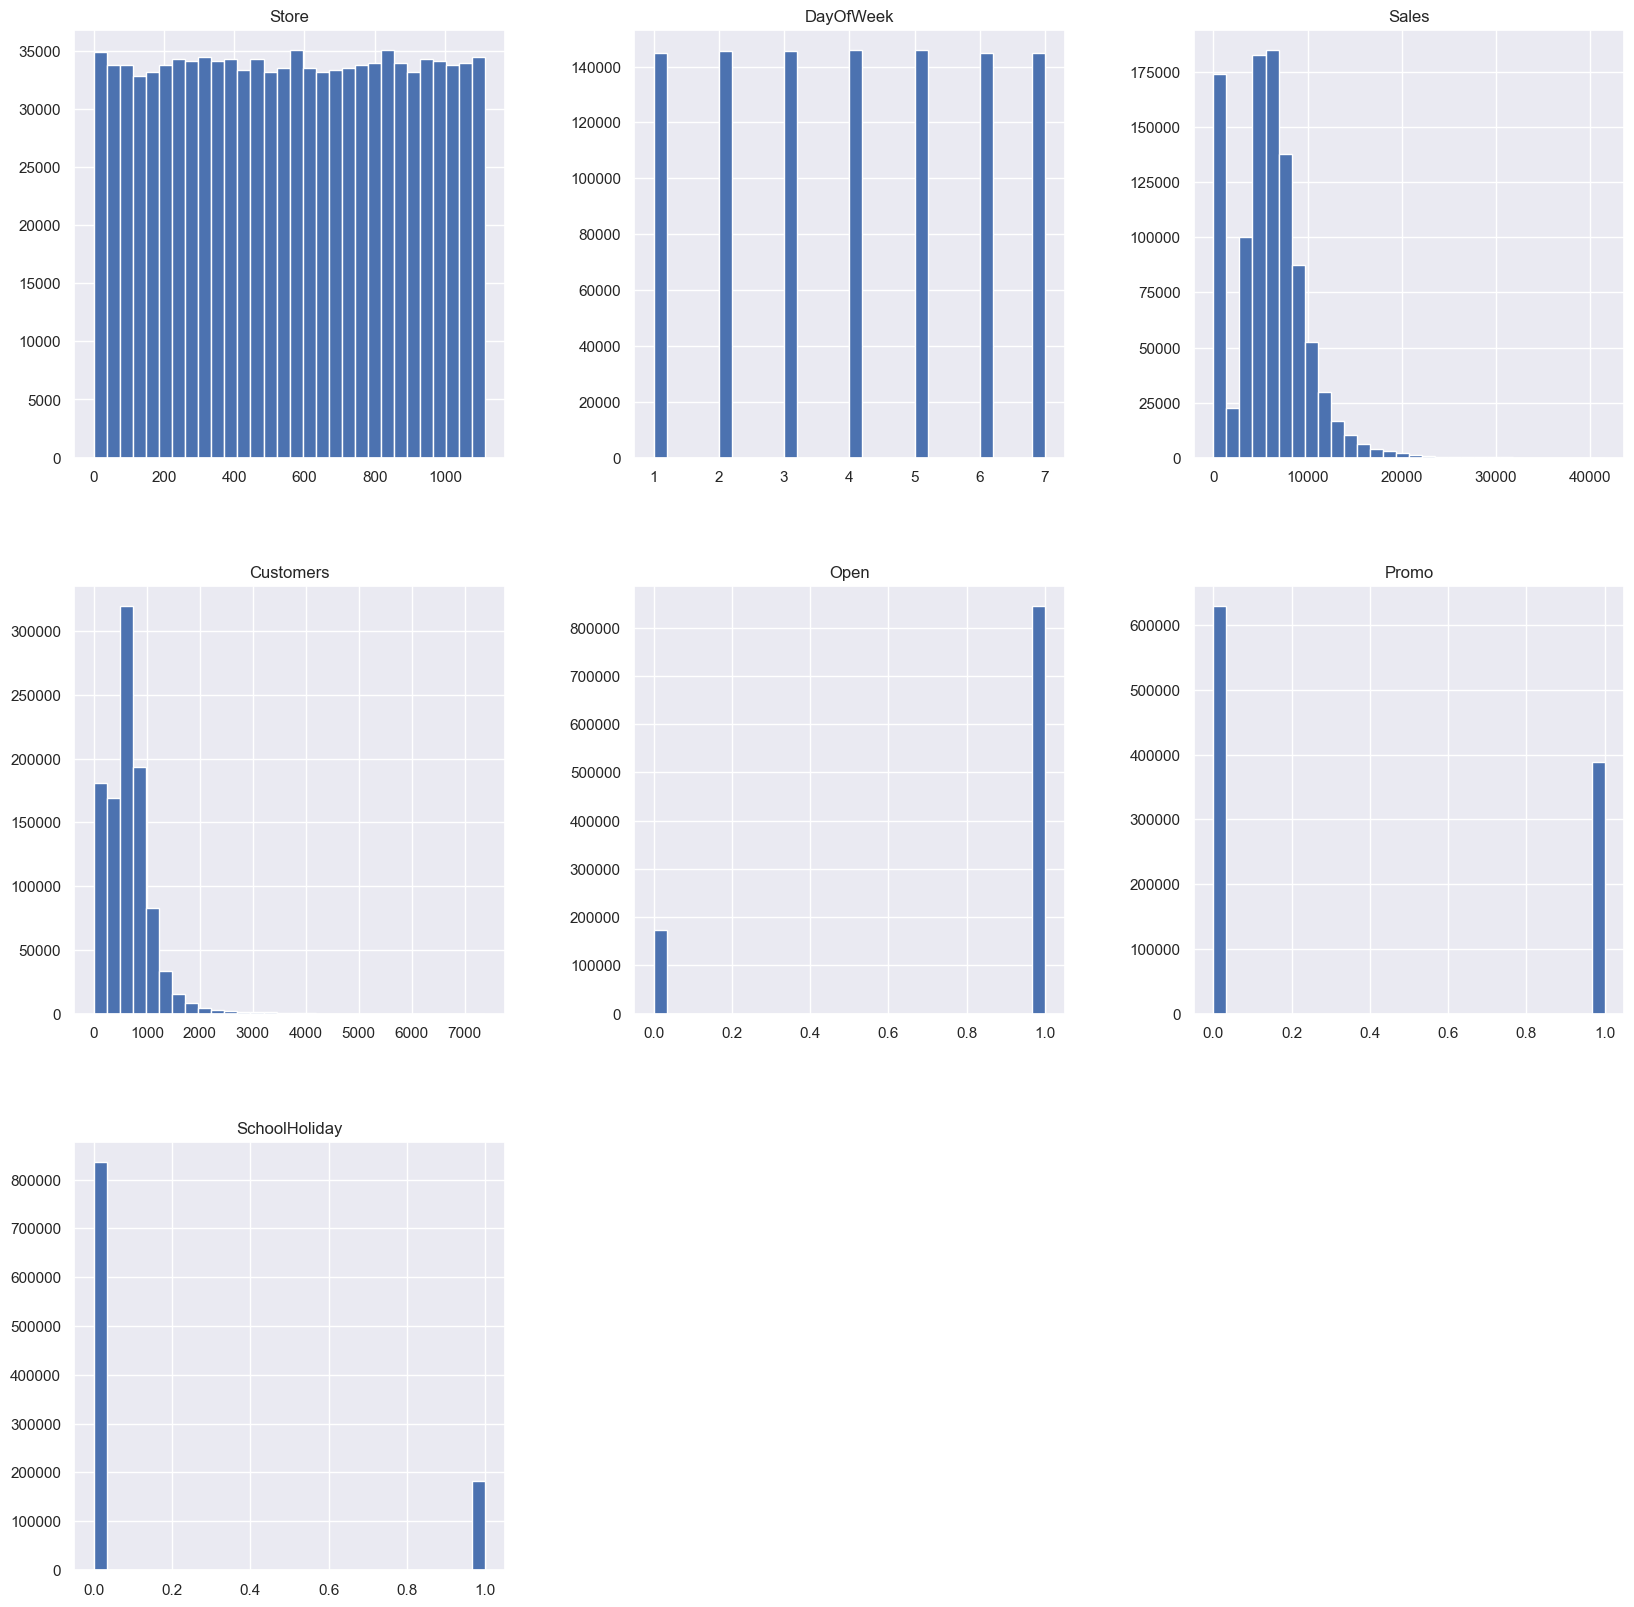

In [23]:
sns.set()
df_sales.hist(bins=30, figsize=(20,20));

* Promedio de 600 clientes por día, el máximo es 4500
* Los datos se distribuyen por igual en varios días de la semana (~ 150000 observaciones x 7 días = ~ 1,1 millones de observaciones)
* Las tiendas están abiertas ~ 80% del tiempo
* Los datos se distribuyen por igual entre todas las tiendas (sin sesgo)
* La promoción # 1 se ejecutó aproximadamente el 40% del tiempo
* Ventas promedio alrededor de 5000-6000 Euros
* Las vacaciones escolares duran alrededor del 18% del tiempo


### <font color="cyan">¿Cuántas tiendas están abiertas y cerradas?</font>


In [31]:
closed_train_df = df_sales[df_sales['Open'] == 0]
open_train_df   = df_sales[df_sales['Open'] == 1]


print("Total = {} ".format(len(df_sales)))
print("Número de tiendas abiertas = {}".format(len(open_train_df)))
print("Número de tiendas cerradas = {}".format(len(closed_train_df)))
print("Porcentaje de tiendas cerradas = {}%".format(round( 100.0*len(closed_train_df)/len(df_sales) ,3)))
print("Porcentaje de tiendas abiertas = {}%".format(round( 100.0*len(open_train_df)/len(df_sales) ,3)))

Total = 1017209 
Número de tiendas abiertas = 844392
Número de tiendas cerradas = 172817
Porcentaje de tiendas cerradas = 16.989%
Porcentaje de tiendas abiertas = 83.011%


In [32]:
# Quedandonos solo con las tiendas que se encuentra abiertas
sales_train_df = df_sales[df_sales['Open'] == 1]
# eliminando la columna "open"
del sales_train_df['Open']

sales_train_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,0,1
1,2,5,2015-07-31,6064,625,1,0,1
2,3,5,2015-07-31,8314,821,1,0,1
3,4,5,2015-07-31,13995,1498,1,0,1
4,5,5,2015-07-31,4822,559,1,0,1


In [33]:
sales_train_df.describe()

,Store,DayOfWeek,Sales,Customers,Promo,SchoolHoliday
count,844392.000000,844392.000000,844392.000000,844392.000000,844392.000000,844392.000000
mean,558.422920,3.520361,6955.514291,762.728395,0.446352,0.193580
std,321.731914,1.723689,3104.214680,401.227674,0.497114,0.395103
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,280.000000,2.000000,4859.000000,519.000000,0.000000,0.000000
50%,558.000000,3.000000,6369.000000,676.000000,0.000000,0.000000
75%,837.000000,5.000000,8360.000000,893.000000,1.000000,0.000000
max,1115.000000,7.000000,41551.000000,7388.000000,1.000000,1.000000


* Ventas promedio = 6955 Euros, número promedio de clientes = 762 (ha subido)

In [29]:
# Establecer como tipo de dato datetime la columna Date
sales_train_df['Date'] = pd.to_datetime(sales_train_df['Date'])

C:\Users\Alex\AppData\Local\Temp\ipykernel_4868\3458993078.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales_train_df['Date'] = pd.to_datetime(sales_train_df['Date'])


### <font color="cyan">Búsqueda de datos faltantes en el dataset de tiendas</font>

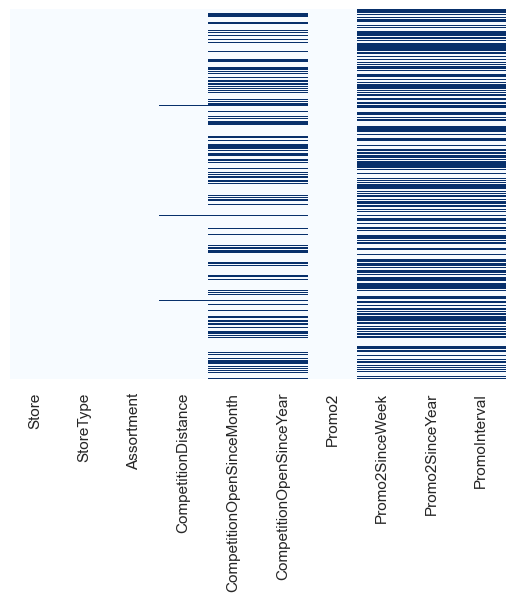

In [35]:
sns.heatmap(df_store.isnull(), yticklabels=False, cbar=False, cmap = "Blues");

In [36]:
df_store.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

In [38]:
# Calculamos el número de valores faltantes por columna
missing_values_count = df_store.isnull().sum()
# Calculamos el porcentaje de valores faltantes por columna
missing_values_percent = missing_values_count / len(df_store) * 100
missing_values_percent

Store                         0.000000
StoreType                     0.000000
Assortment                    0.000000
CompetitionDistance           0.269058
CompetitionOpenSinceMonth    31.748879
CompetitionOpenSinceYear     31.748879
Promo2                        0.000000
Promo2SinceWeek              48.789238
Promo2SinceYear              48.789238
PromoInterval                48.789238
dtype: float64

* Se observa una gran cantidad de datos faltantes en 5 columnas entre 30 a 48% de datos faltantes y 3 datos faltantes en la columna CompetitionDistance.   

### <font color="cyan">Qué tiendas no tienen la distancia a su competidor?</font>

In [37]:
df_store[df_store['CompetitionDistance'].isnull()]

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
290,291,d,a,NaN,NaN,NaN,0,NaN,NaN,NaN
621,622,a,c,NaN,NaN,NaN,0,NaN,NaN,NaN
878,879,d,a,NaN,NaN,NaN,1,5.0,2013.0,"Feb,May,Aug,Nov"


In [40]:
# Analizando la columna promo2
df_store[df_store['Promo2']==0].head(20)

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
5,6,a,a,310.0,12.0,2013.0,0,NaN,NaN,NaN
6,7,a,c,24000.0,4.0,2013.0,0,NaN,NaN,NaN
7,8,a,a,7520.0,10.0,2014.0,0,NaN,NaN,NaN
8,9,a,c,2030.0,8.0,2000.0,0,NaN,NaN,NaN
9,10,a,a,3160.0,9.0,2009.0,0,NaN,NaN,NaN
15,16,a,c,3270.0,NaN,NaN,0,NaN,NaN,NaN
22,23,d,a,4060.0,8.0,2005.0,0,NaN,NaN,NaN


* Se observa que los datos faltantes son debido a que dihas tiendas nunca realizaron ninguna promoción, por lo que los otros campos se encuentran vacios.

## <div style="text-align: center; color:black; background-color: #000011; font-size: 30px; font-family: Fantasy; padding: 5px; border-radius:10px; text-shadow: 0 0 5px white, 0 0 5px white, 0 0 5px blue, 0 0 10px blue, 0 0 10px blue, 0 0 10px blue, 0 0 50px blue;">Preprocesamiento de los datos</div>

### <font color="cyan">Tratamiento de datos faltantes</font>

In [41]:
# Hay 354 filas donde 'CompetitionOpenSinceYear' y 'CompetitionOpenSinceMonth'
# Estableceremos los valores en ceros
str_cols = ['Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval', 'CompetitionOpenSinceYear', 'CompetitionOpenSinceMonth']
# Reemplazando con 0 las respectivas columnas donde faltan valores
for str in str_cols:
    df_store[str].fillna(0, inplace = True)

In [43]:
df_store.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,0.0,0.0,0
4,5,a,a,29910.0,4.0,2015.0,0,0.0,0.0,0


In [42]:
df_store.isnull().sum()

Store                        0
StoreType                    0
Assortment                   0
CompetitionDistance          3
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

In [45]:
# Hay 3 filas con valores de 'CompetitionDistance' que faltan, llenémoslas con valores de la mediana de la columna 'CompetitionDistance'
df_store['CompetitionDistance'].fillna(df_store['CompetitionDistance'].median(), inplace=True)
df_store.isnull().sum()

Store                        0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

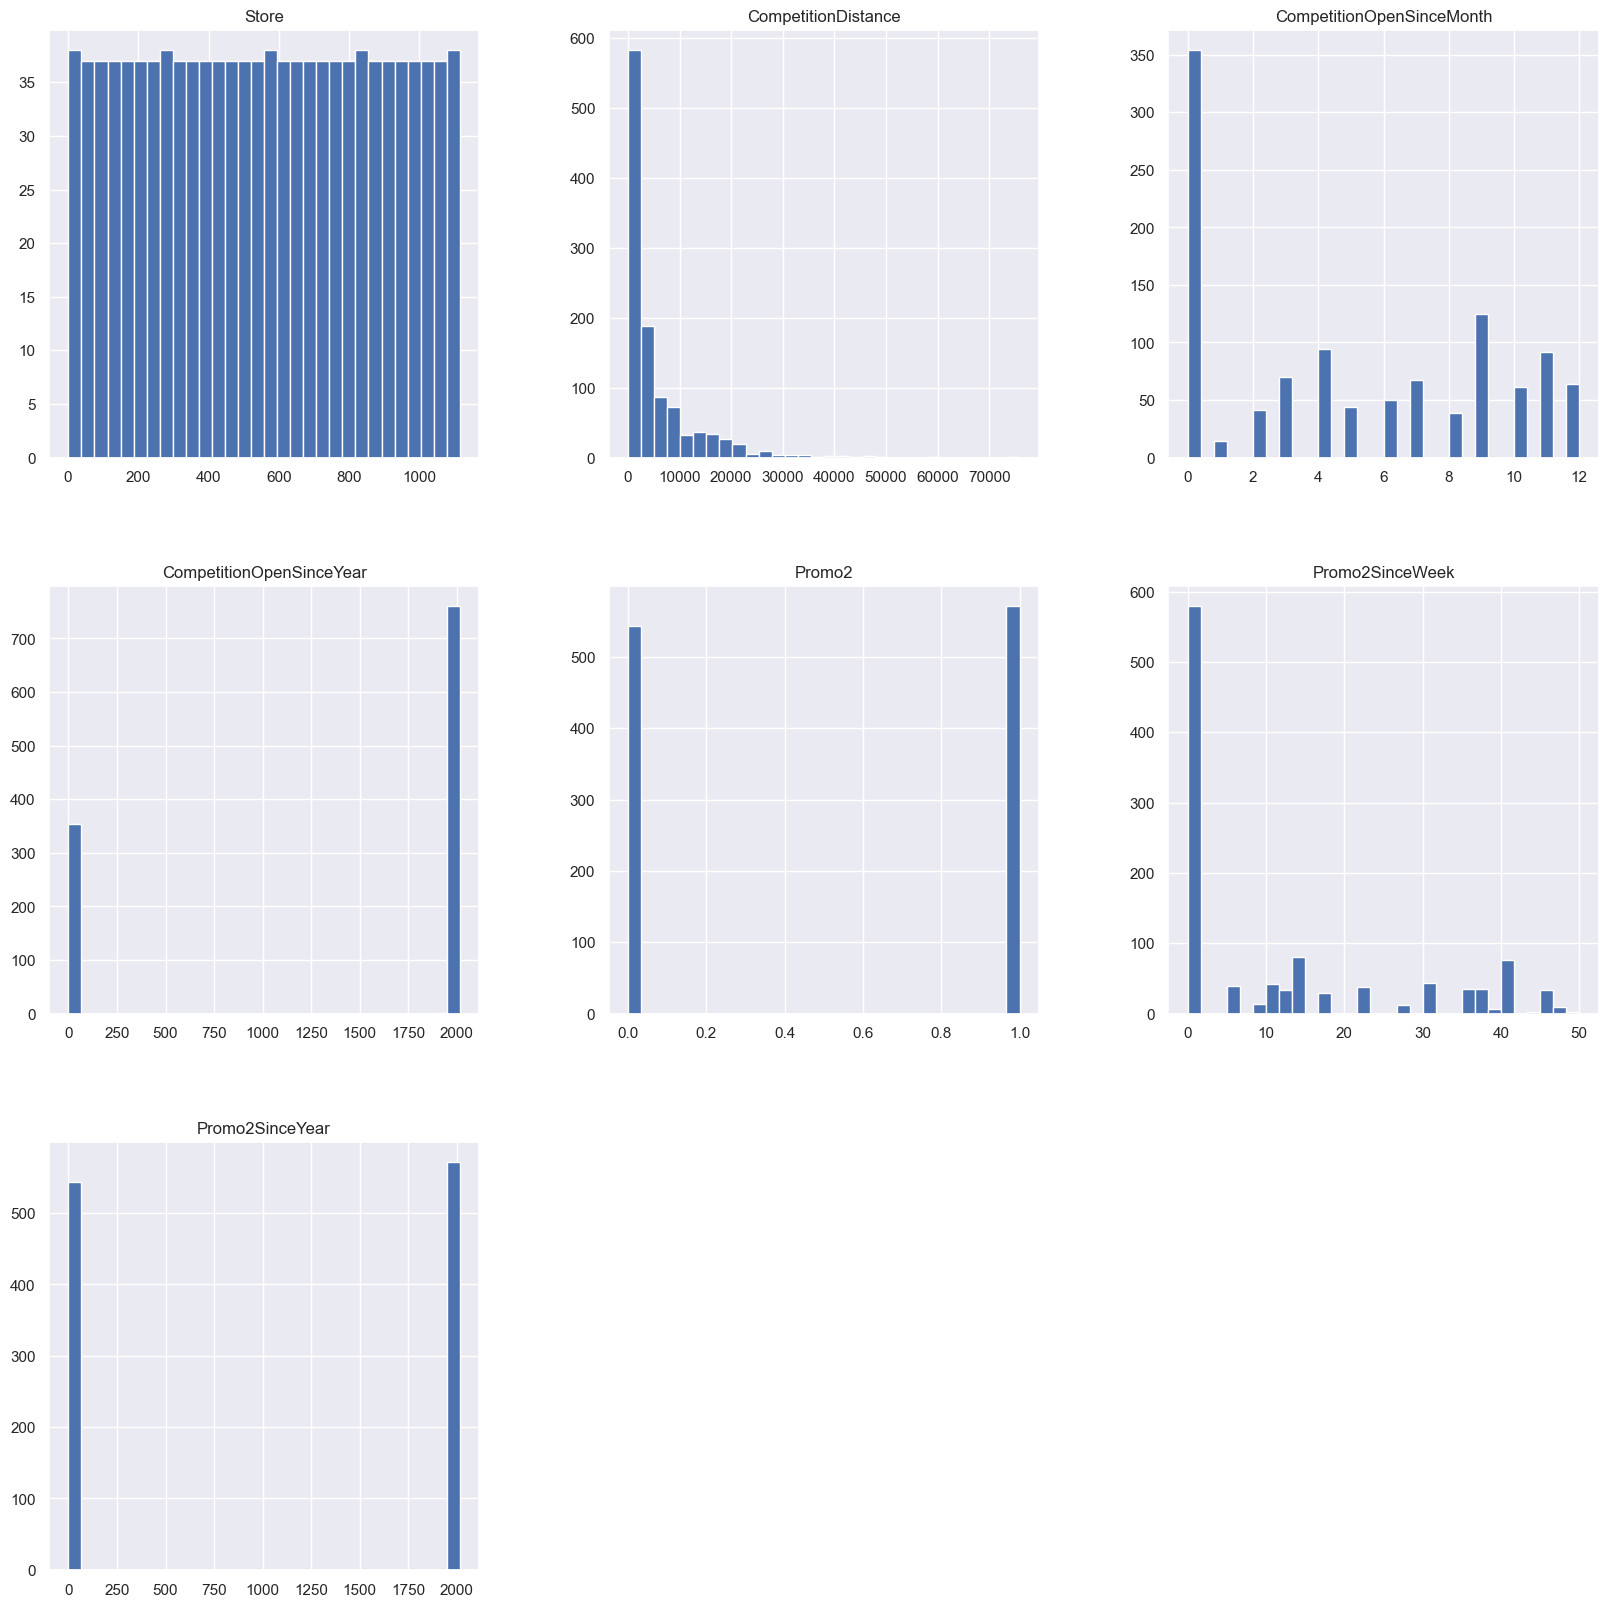

In [47]:
df_store.hist(bins = 30, figsize=(20,20));

* Hay 350 tiendas de las cuales se desconoce cuando abrió su competidor.
* La mitad de las tiendas realizan la promoción 2 y la otra mitad no.
* Las promociones se dan entre la semana 1 y la semana 50.
* la mitad de las tiendas tienen su competencia a una distancia de 0-3000 m (3 kms de distancia).

### <font color="cyan">Análisis exploratorio sobre el dataset combinado</font>

In [102]:
# Combinando ambos datasets
sales_train_all_df = pd.merge(sales_train_df, df_store, how = 'inner', on = 'Store')
sales_train_all_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,1,4,2015-07-30,5020,546,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
2,1,3,2015-07-29,4782,523,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
3,1,2,2015-07-28,5011,560,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
4,1,1,2015-07-27,6102,612,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0


In [49]:
# Exportando el dataset combinado en formato csv
sales_train_all_df.to_csv('../data/dataset_full.csv', index = False)

In [53]:
#sales_train_all_df = pd.read_csv("../data/dataset_full.csv", index_col="Date")

In [103]:
sales_train_all_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 844392 entries, 0 to 844391
Data columns (total 17 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Store                      844392 non-null  int64  
 1   DayOfWeek                  844392 non-null  int64  
 2   Date                       844392 non-null  object 
 3   Sales                      844392 non-null  int64  
 4   Customers                  844392 non-null  int64  
 5   Promo                      844392 non-null  int64  
 6   StateHoliday               844392 non-null  object 
 7   SchoolHoliday              844392 non-null  int64  
 8   StoreType                  844392 non-null  object 
 9   Assortment                 844392 non-null  object 
 10  CompetitionDistance        844392 non-null  float64
 11  CompetitionOpenSinceMonth  844392 non-null  float64
 12  CompetitionOpenSinceYear   844392 non-null  float64
 13  Promo2                     84

### <font color="cyan">Obtener los datos únicos de cada columna</font>

In [104]:
for col in sales_train_all_df.columns:
    print(col)
    print(f"{sales_train_all_df[col].unique()} \n")

Store
[   1    2    3 ... 1115  876  292] 

DayOfWeek
[5 4 3 2 1 6 7] 

Date
['2015-07-31' '2015-07-30' '2015-07-29' '2015-07-28' '2015-07-27'
 '2015-07-25' '2015-07-24' '2015-07-23' '2015-07-22' '2015-07-21'
 '2015-07-20' '2015-07-18' '2015-07-17' '2015-07-16' '2015-07-15'
 '2015-07-14' '2015-07-13' '2015-07-11' '2015-07-10' '2015-07-09'
 '2015-07-08' '2015-07-07' '2015-07-06' '2015-07-04' '2015-07-03'
 '2015-07-02' '2015-07-01' '2015-06-30' '2015-06-29' '2015-06-27'
 '2015-06-26' '2015-06-25' '2015-06-24' '2015-06-23' '2015-06-22'
 '2015-06-20' '2015-06-19' '2015-06-18' '2015-06-17' '2015-06-16'
 '2015-06-15' '2015-06-13' '2015-06-12' '2015-06-11' '2015-06-10'
 '2015-06-09' '2015-06-08' '2015-06-06' '2015-06-05' '2015-06-03'
 '2015-06-02' '2015-06-01' '2015-05-30' '2015-05-29' '2015-05-28'
 '2015-05-27' '2015-05-26' '2015-05-23' '2015-05-22' '2015-05-21'
 '2015-05-20' '2015-05-19' '2015-05-18' '2015-05-16' '2015-05-15'
 '2015-05-13' '2015-05-12' '2015-05-11' '2015-05-09' '2015-05-08'

### <font color="cyan">Matriz de correlación "ventas" vs todas las columnas numéricas</font>

<Axes: >

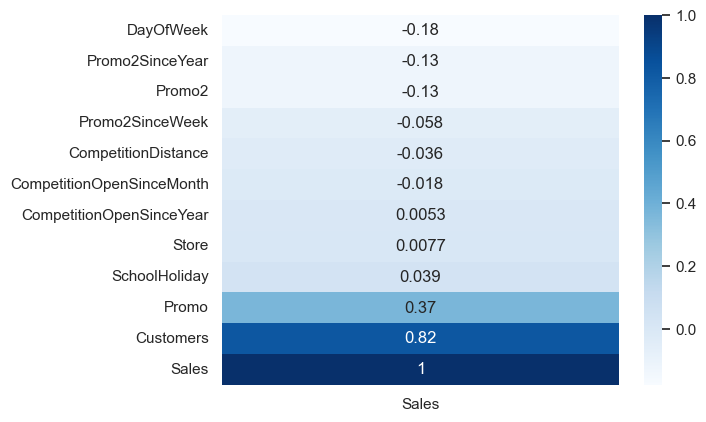

In [105]:
# Correlación
num_cols = sales_train_all_df.select_dtypes(include = ["int16", "int32", "int64", "float16", "float32", "float64"]).columns
correlations = sales_train_all_df[num_cols].corr()['Sales'].sort_values(ascending=True)
sns.heatmap(pd.DataFrame(correlations), annot=True, cmap="Blues")

* A medida que pasan los dias de la semana las ventas decrecen, por lo que en los dias 5 6 y 7 habra menor venta.
* Cuanto mas tarde inician las promociones menor es el número de ventas.
* El valor de promo2 negativo, indica posiblemente que se este realizando ventas pero estas no se venden lo suficiente para justificar la promo2, por lo que la promo2 no es muy efectiva.
* Los clientes y la promoción se correlacionan positivamente con las ventas.

### <font color="cyan">Matriz de correlación todos contra todos</font>

<Axes: >

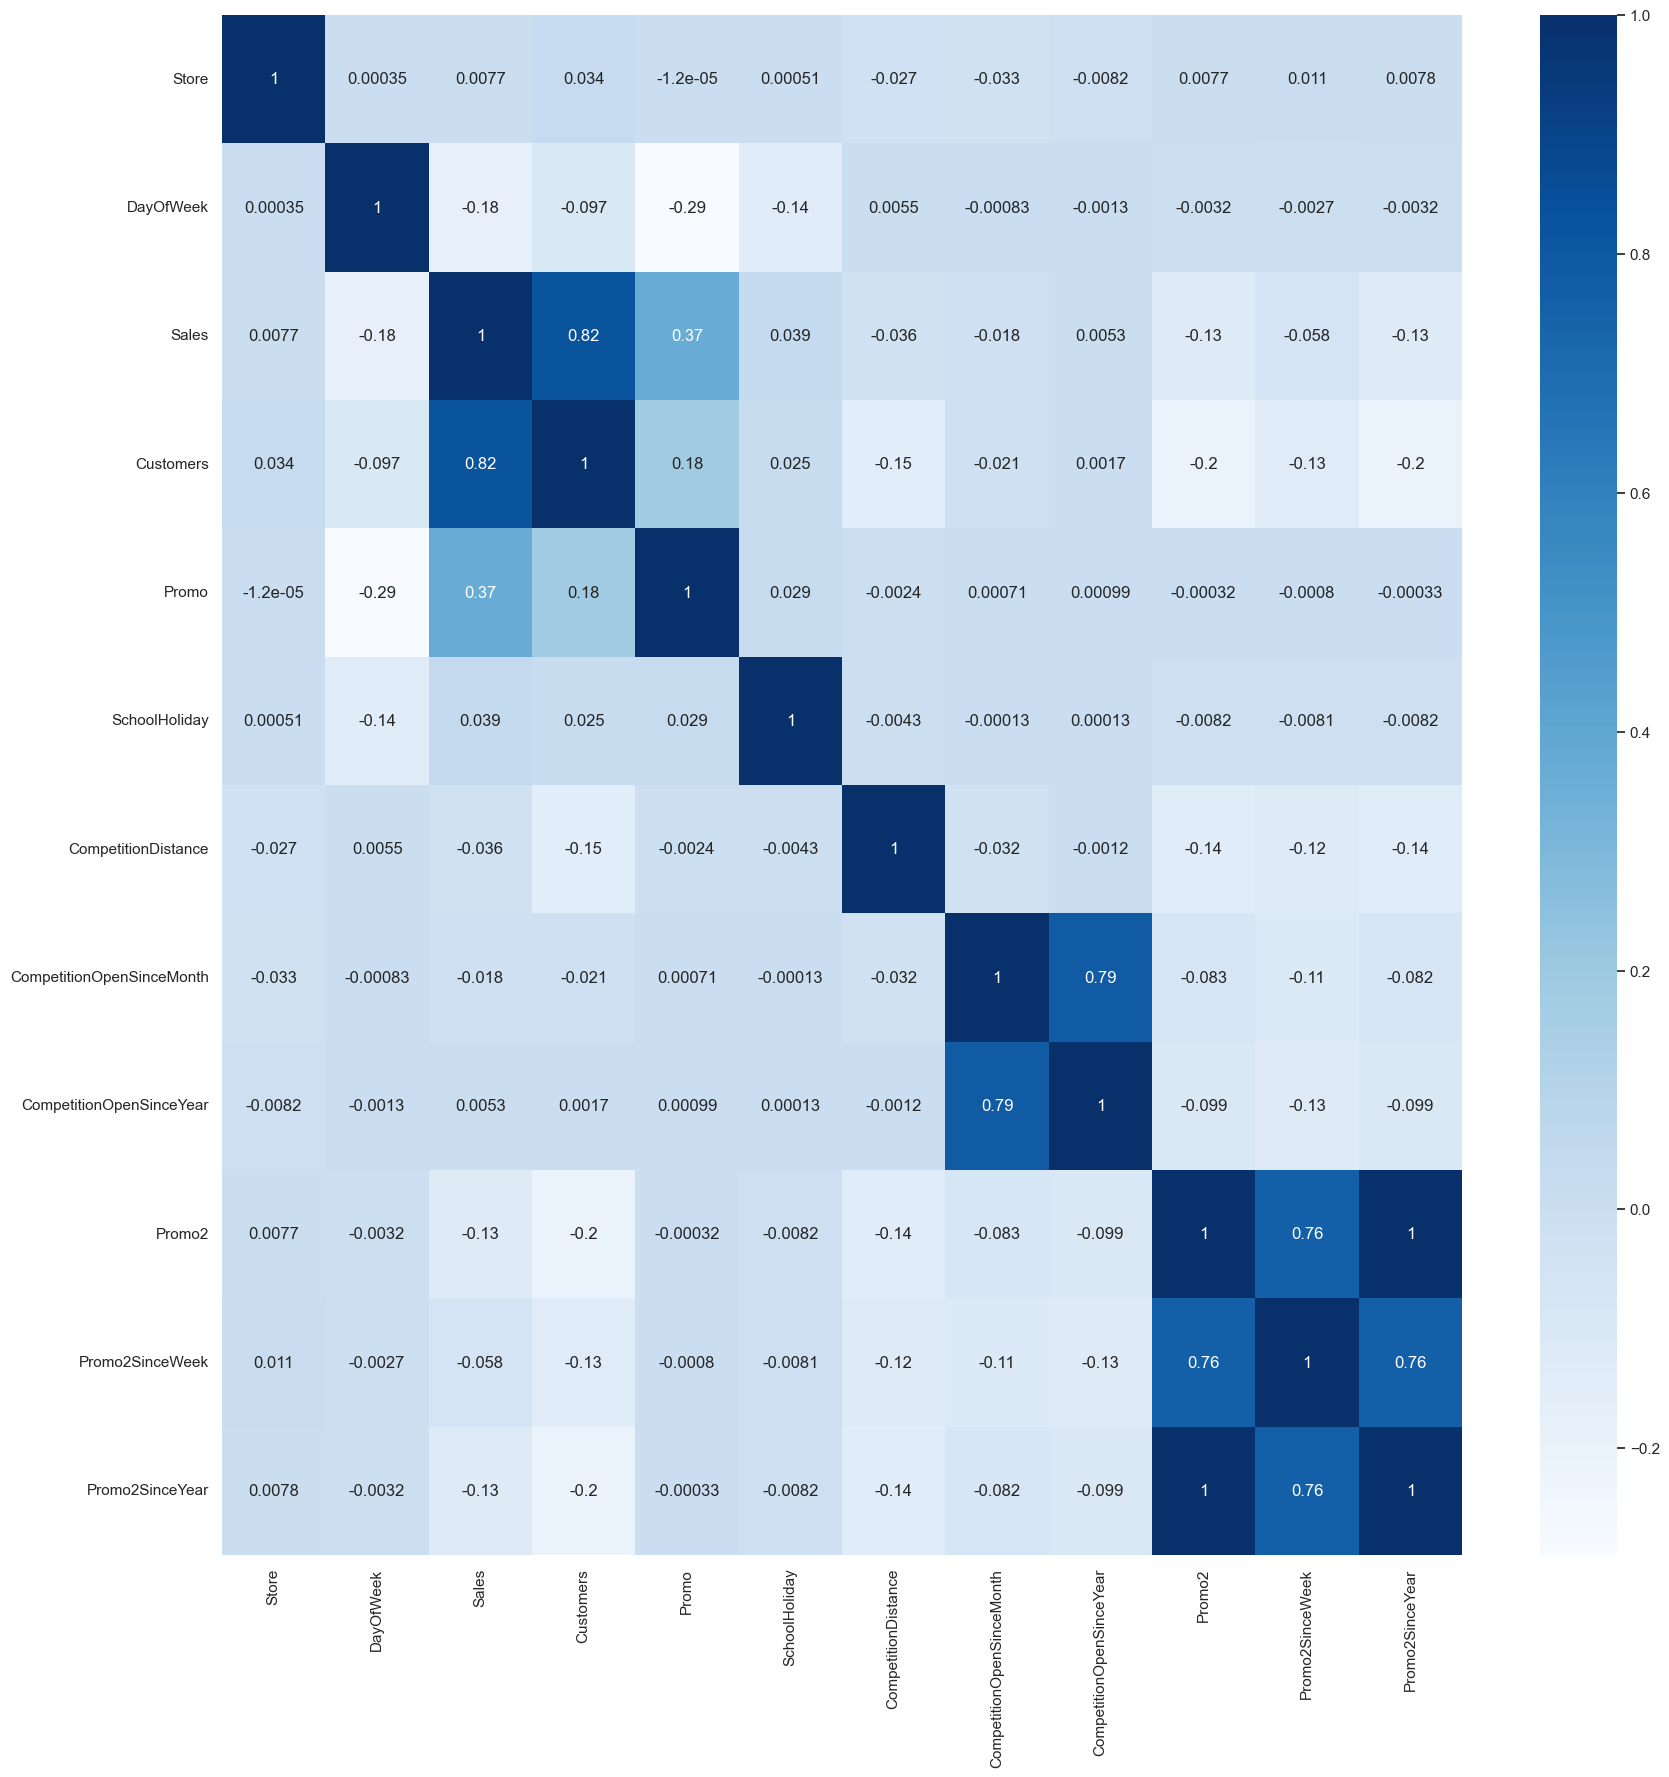

In [106]:
correlations = sales_train_all_df[num_cols].corr()
f, ax = plt.subplots(figsize = (20,20))
sns.heatmap(correlations, annot=True, cmap="Blues")

In [107]:
# estableciendo como tipo fecha la columna date
sales_train_all_df['Date'] = pd.to_datetime(sales_train_all_df['Date'], dayfirst=True)

C:\Users\Alex\AppData\Local\Temp\ipykernel_4868\1380335290.py:2: UserWarning: Parsing dates in %Y-%m-%d format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.
  sales_train_all_df['Date'] = pd.to_datetime(sales_train_all_df['Date'], dayfirst=True)


### <font color="cyan">Agregando nuevas columnas</font>

In [108]:
# agregando una nueva Year
sales_train_all_df['Year'] = pd.DatetimeIndex(sales_train_all_df["Date"]).year
# agregando una nueva Month
sales_train_all_df['Month'] = pd.DatetimeIndex(sales_train_all_df["Date"]).month
# agregando una nueva Day
sales_train_all_df['Day'] = pd.DatetimeIndex(sales_train_all_df["Date"]).day

### <font color="cyan">Análisis de las ventas a lo largo del tiempo</font>

Text(0.5, 1.0, 'Ventas promedio por Día')

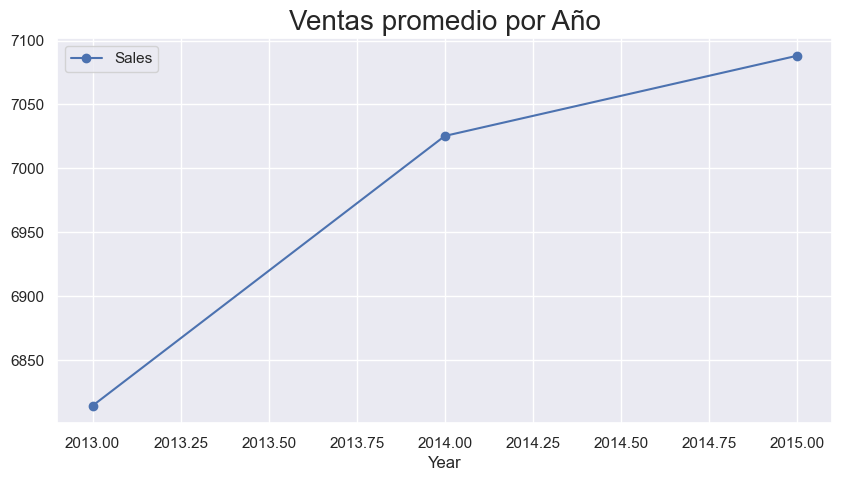

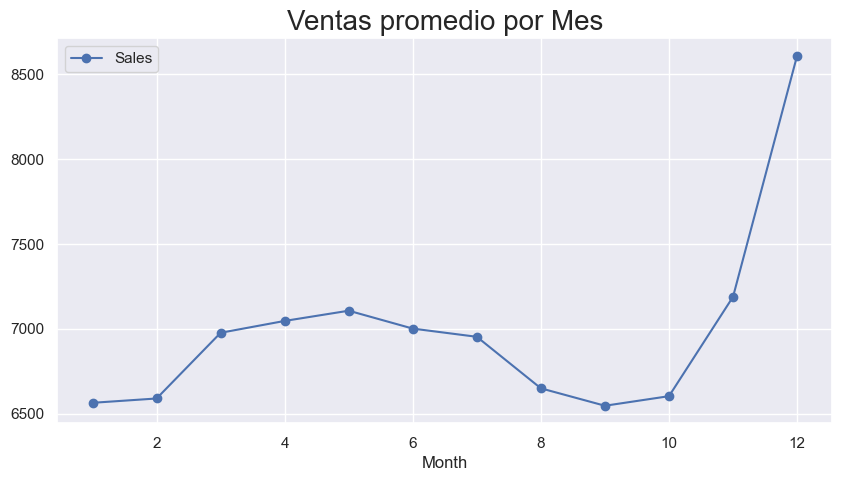

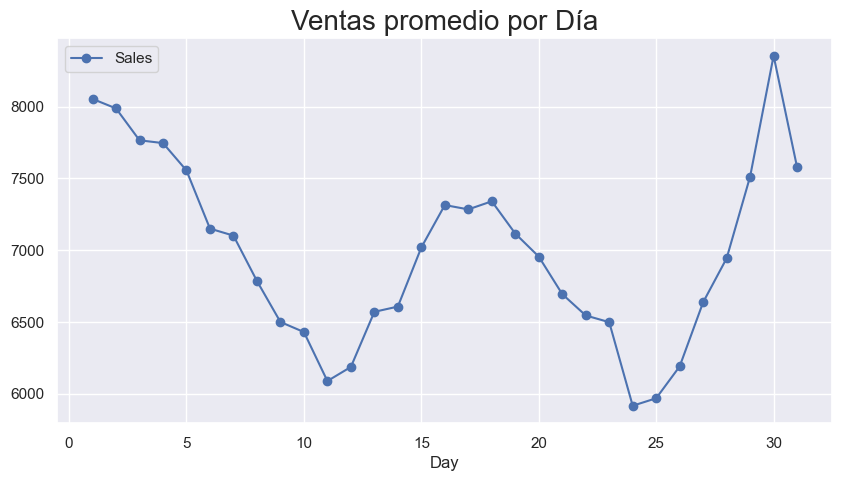

In [109]:
# ventas vs date
axis = sales_train_all_df.groupby('Year')[['Sales']].mean().plot(figsize = (10, 5), marker = 'o')
axis.set_title("Ventas promedio por Año", size=20)

axis = sales_train_all_df.groupby('Month')[['Sales']].mean().plot(figsize = (10, 5), marker = 'o')
axis.set_title("Ventas promedio por Mes", size=20)

axis = sales_train_all_df.groupby('Day')[['Sales']].mean().plot(figsize = (10, 5), marker = 'o')
axis.set_title("Ventas promedio por Día", size=20)

### <font color="cyan">Análisis de las Clientes a lo largo del tiempo</font>

Text(0.5, 1.0, 'Clientes promedio por Día')

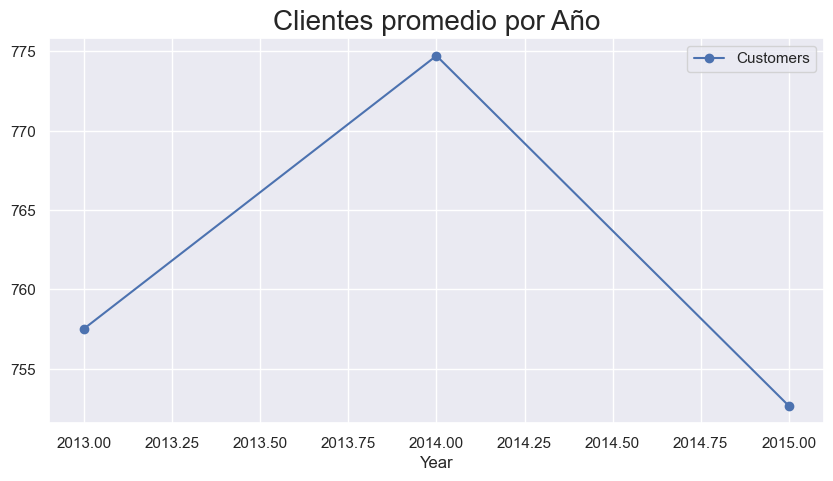

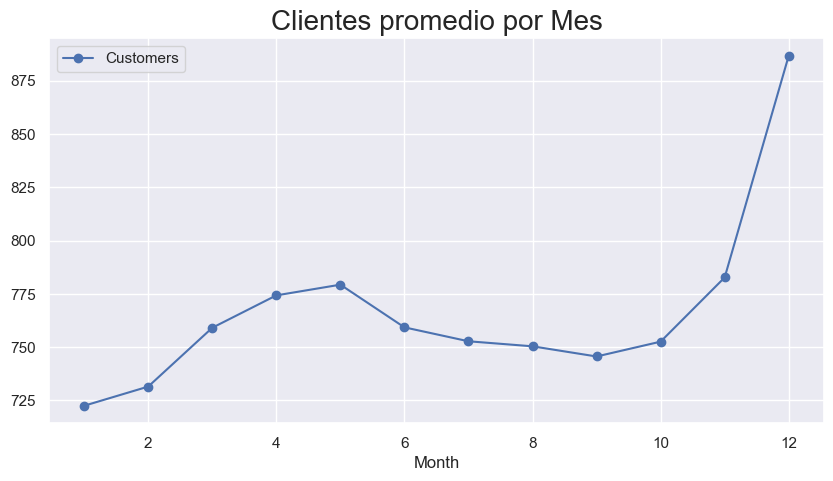

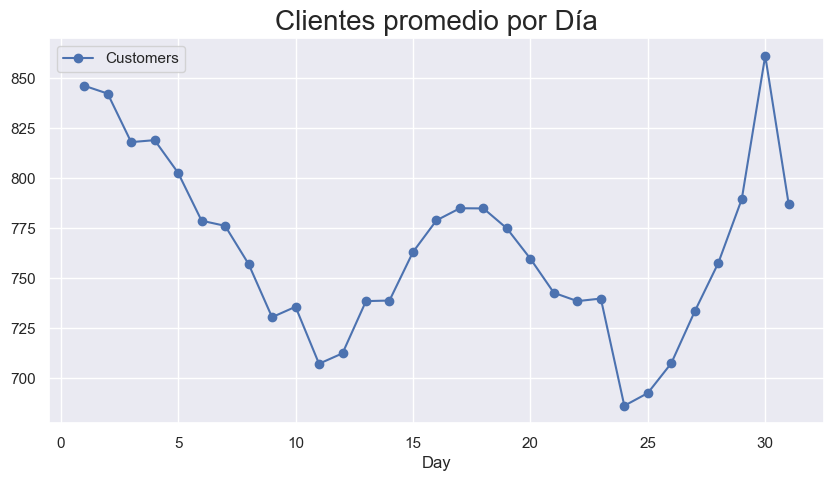

In [110]:
# ventas vs date
axis = sales_train_all_df.groupby('Year')[['Customers']].mean().plot(figsize = (10, 5), marker = 'o')
axis.set_title("Clientes promedio por Año", size=20)

axis = sales_train_all_df.groupby('Month')[['Customers']].mean().plot(figsize = (10, 5), marker = 'o')
axis.set_title("Clientes promedio por Mes", size=20)

axis = sales_train_all_df.groupby('Day')[['Customers']].mean().plot(figsize = (10, 5), marker = 'o')
axis.set_title("Clientes promedio por Día", size=20)

* Se observa que las ventas y el número de clientes alcanzan su punto máximo en el período de Navidad
* Durante los dias 15 y 20 hay mayor concurrencia de cliente lo cual trae consigo mayor cantidad de ventas.

Text(0.5, 1.0, 'Clientes promedio por dia de la semana')

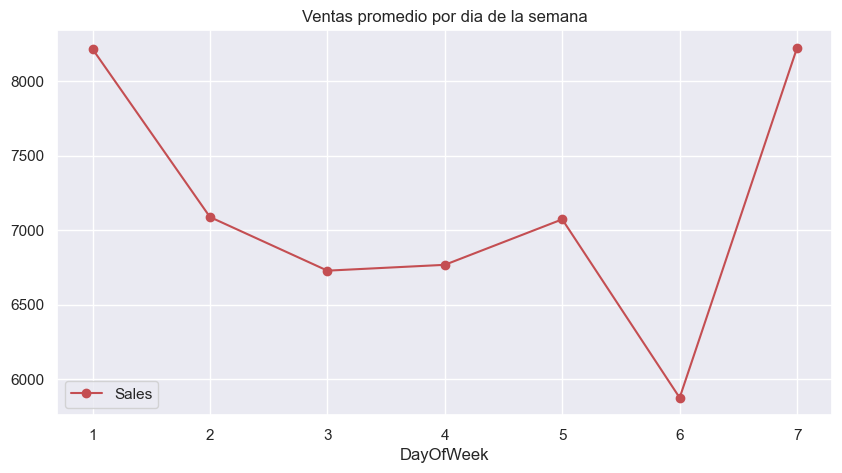

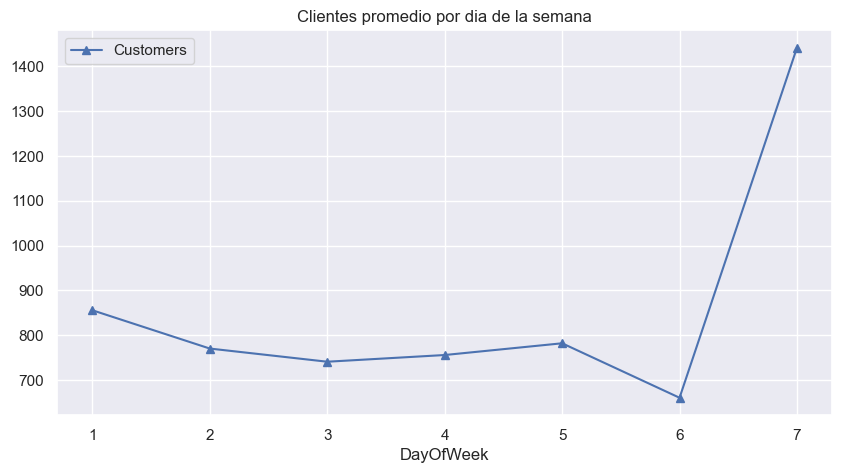

In [111]:
axis = sales_train_all_df.groupby('DayOfWeek')[['Sales']].mean().plot(figsize = (10, 5), marker = 'o', color = 'r')
axis.set_title("Ventas promedio por dia de la semana")

axis = sales_train_all_df.groupby('DayOfWeek')[['Customers']].mean().plot(figsize = (10, 5), marker = '^', color = 'b')
axis.set_title("Clientes promedio por dia de la semana")

* Los domingos y los unes son los días con mayor venta, sin embargo donde hay mayor concurrencia de clientes son los domingos.

<Axes: xlabel='Promo', ylabel='Customers'>

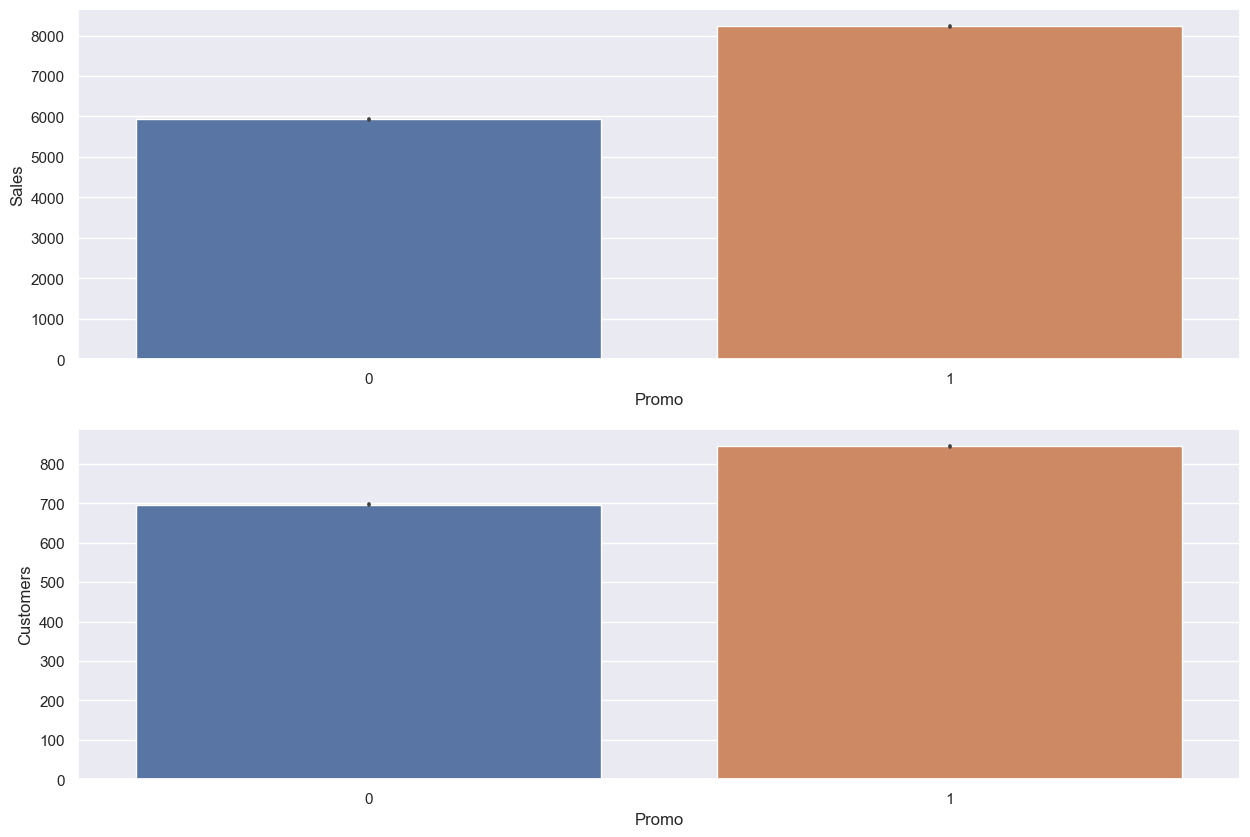

In [115]:
plt.figure(figsize=[15,10])

plt.subplot(211)
sns.barplot(x = 'Promo', y = 'Sales', data = sales_train_all_df)

plt.subplot(212)
sns.barplot(x = 'Promo', y = 'Customers', data = sales_train_all_df)

<Axes: xlabel='Promo', ylabel='Customers'>

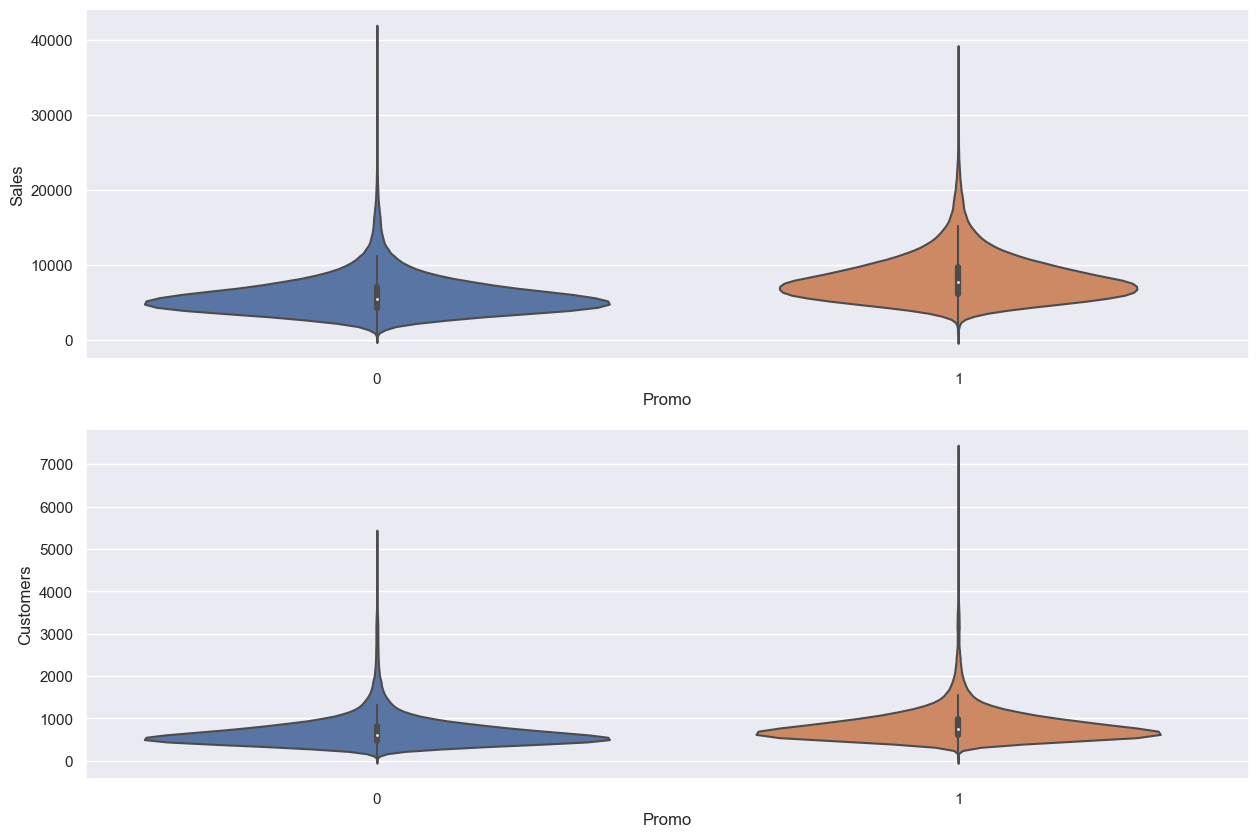

In [114]:
# distribucion de probabilidad en funcion de si hay o no hay promocion
plt.figure(figsize=[15,10])

plt.subplot(211)
sns.violinplot(x = 'Promo', y = 'Sales', data = sales_train_all_df)

plt.subplot(212)
sns.violinplot(x = 'Promo', y = 'Customers', data = sales_train_all_df)

<Axes: >

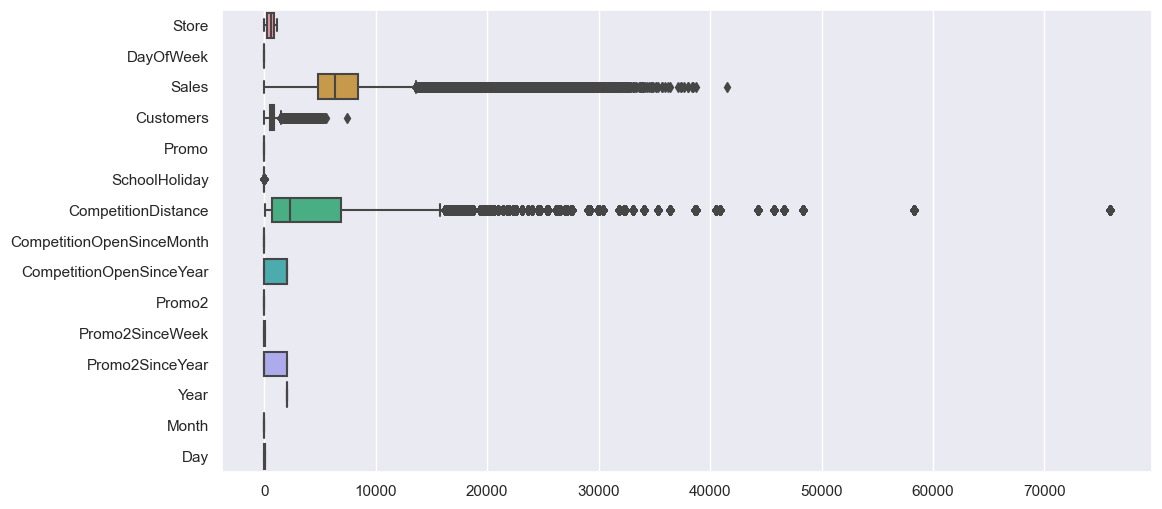

In [119]:
plt.subplots(figsize=(12, 6))
sns.boxplot(sales_train_all_df, orient="h")

## <div style="text-align: center; color:black; background-color: #000011; font-size: 30px; font-family: Fantasy; padding: 5px; border-radius:10px; text-shadow: 0 0 5px white, 0 0 5px white, 0 0 5px blue, 0 0 10px blue, 0 0 10px blue, 0 0 10px blue, 0 0 50px blue;">Entendiendo el algoritmo Prophet</div>


## <div style="text-align: center; color:black; background-color: #000011; font-size: 30px; font-family: Fantasy; padding: 5px; border-radius:10px; text-shadow: 0 0 5px white, 0 0 5px white, 0 0 5px blue, 0 0 10px blue, 0 0 10px blue, 0 0 10px blue, 0 0 50px blue;">Modelado</div>

In [122]:
def sales_predictions(Store_ID, sales_df, periods):
    sales_df = sales_df[sales_df['Store'] == Store_ID]
    sales_df = sales_df[['Date', 'Sales']].rename(columns = {'Date': 'ds', 'Sales': 'y'})
    sales_df = sales_df.sort_values('ds')

    model    = Prophet()
    model.fit(sales_df)
    future   = model.make_future_dataframe(periods = periods)
    forecast = model.predict(future)
    figure   = model.plot(forecast, xlabel = "Fecha", ylabel = "Ventas")
    figure2  = model.plot_components(forecast)

21:39:23 - cmdstanpy - INFO - Chain [1] start processing
21:39:23 - cmdstanpy - INFO - Chain [1] done processing


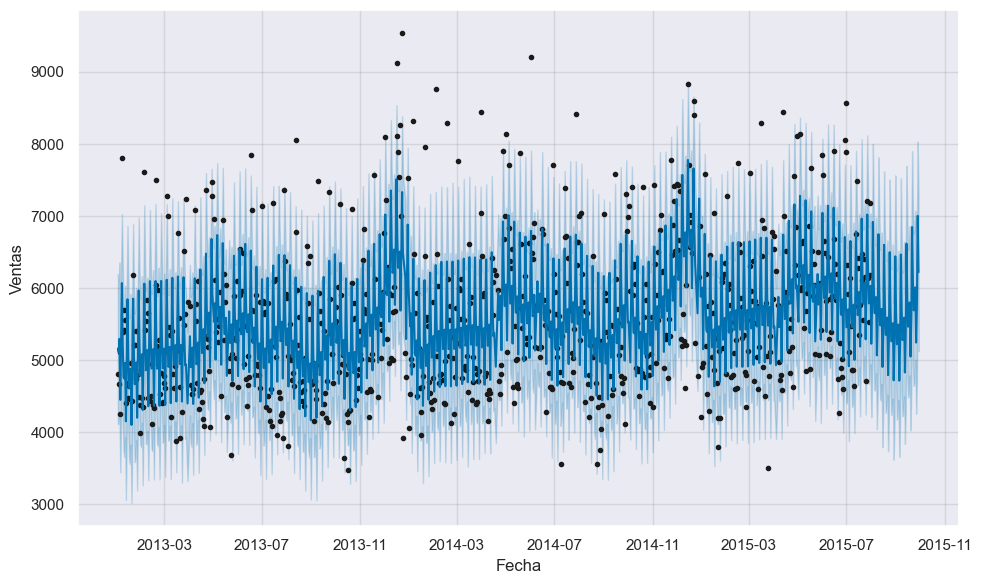

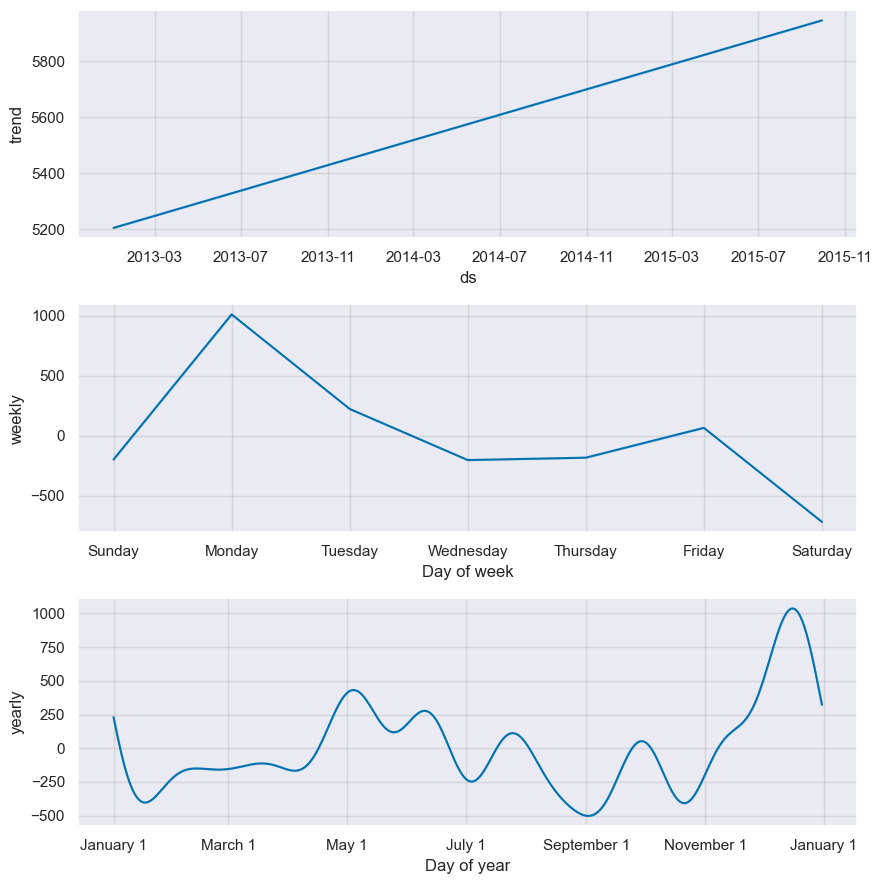

In [123]:
sales_predictions(10, sales_train_all_df, 60)

## <div style="text-align: center; color:black; background-color: #000011; font-size: 30px; font-family: Fantasy; padding: 5px; border-radius:10px; text-shadow: 0 0 5px white, 0 0 5px white, 0 0 5px blue, 0 0 10px blue, 0 0 10px blue, 0 0 10px blue, 0 0 50px blue;">Validación</div>


